# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Elfikry
- **Email:** melfikry@gmail.com 
- **ID Dicoding:** muhammadelfikry

## Menentukan Pertanyaan Bisnis

- What is the sales trend in each month
- What is the distribution of customers in each quarter by customer type
- Whether the increase or sales are affected by external factors
- At what time of day do most sales occur

## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
day_df = pd.read_csv("./dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df = pd.read_csv("./dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The day dataset has 16 columns
- The hour dataset has the same columns as the day dataset but has 1 additional hour column

### Assessing Data

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
print(f"Number of duplicates: {day_df.duplicated().sum()}")
day_df.describe()

Number of duplicates: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [31]:
print(f"Number of duplicates: {hour_df.duplicated().sum()}")
hour_df.describe()

Number of duplicates: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Each dataframe has no missing values or duplicated data.
- The dteday column in each dataframe has an object data type error that should be of datetime type.

### Cleaning Data

In [32]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [33]:
columns = {"temp": 41, "atemp": 50, "hum": 100, "windspeed": 67}

for column in columns:
    day_df[column] = day_df[column] * columns[column]

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [35]:
columns = {"temp": 41, "atemp": 50, "hum": 100, "windspeed": 67}

for column in columns:
    hour_df[column] = hour_df[column] * columns[column]

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Change the data type of the dteday column in each dataframe from object to datetime
- Denormalization column temp, atemp, hum and windspeed

## Exploratory Data Analysis (EDA)

### Explore ...

In [36]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [37]:
monthly_orders = day_df.groupby(by=pd.Grouper(key="dteday", freq="ME")).cnt.sum()
monthly_orders.index = monthly_orders.index.strftime("%Y-%m")
monthly_orders = monthly_orders.reset_index()
monthly_orders

,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


In [38]:
q_orders = day_df.groupby(by=pd.Grouper(key="dteday", freq="QE")).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()
q_orders

,dteday,casual,registered
0,2011-03-31,22141,128308
1,2011-06-30,84008,290195
2,2011-09-30,91839,313611
3,2011-12-31,49264,263737
4,2012-03-31,49308,315448
5,2012-06-30,125985,446934
6,2012-09-30,128680,508003
7,2012-12-31,68792,406426


In [39]:
season_orders = day_df.groupby(by=[pd.Grouper(key="dteday", freq="YE"), "season"]).cnt.sum().reset_index()
season_orders

,dteday,season,cnt
0,2011-12-31,1,150000
1,2011-12-31,2,347316
2,2011-12-31,3,419650
3,2011-12-31,4,326137
4,2012-12-31,1,321348
5,2012-12-31,2,571273
6,2012-12-31,3,641479
7,2012-12-31,4,515476


In [40]:
weathersit_orders = day_df.groupby(by=[pd.Grouper(key="dteday", freq="ME"), "weathersit"]).cnt.sum().reset_index()
weathersit_orders

,dteday,weathersit,cnt
0,2011-01-31,1,21004
1,2011-01-31,2,16679
2,2011-01-31,3,506
3,2011-02-28,1,35190
4,2011-02-28,2,13025
5,2011-03-31,1,39703
6,2011-03-31,2,22034
7,2011-03-31,3,2308
8,2011-04-30,1,52392
9,2011-04-30,2,41683


In [41]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [42]:
bussy_hour = hour_df.groupby(by=[pd.Grouper(key="dteday", freq="ME"), "hr"]).cnt.sum().reset_index()
bussy_hour = bussy_hour.loc[bussy_hour.groupby("dteday").cnt.idxmax()]
bussy_hour

,dteday,hr,cnt
17,2011-01-31,17,4028
41,2011-02-28,17,5032
65,2011-03-31,17,6989
89,2011-04-30,17,10278
113,2011-05-31,17,14048
137,2011-06-30,17,14926
161,2011-07-31,17,13485
185,2011-08-31,17,14208
209,2011-09-30,17,13251
233,2011-10-31,17,13475


**Insight:**
- There is an increasing sales trend every year
- Increase in transactions in the second and third quarters of each year
- Increase and decrease in transactions influenced by Season and weather
- the busiest hour occurs at 17 o'clock every month.

## Visualization & Explanatory Analysis

### - What is the sales trend in each month:

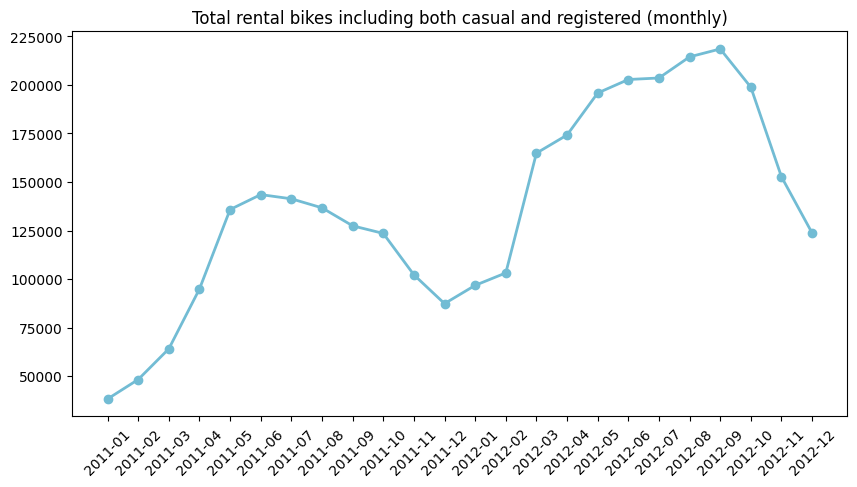

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders["dteday"], monthly_orders["cnt"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Total rental bikes including both casual and registered (monthly)", loc="center")
plt.xticks(rotation=45)
plt.show()

### What is the distribution of customers in each quarter by customer type:

[]

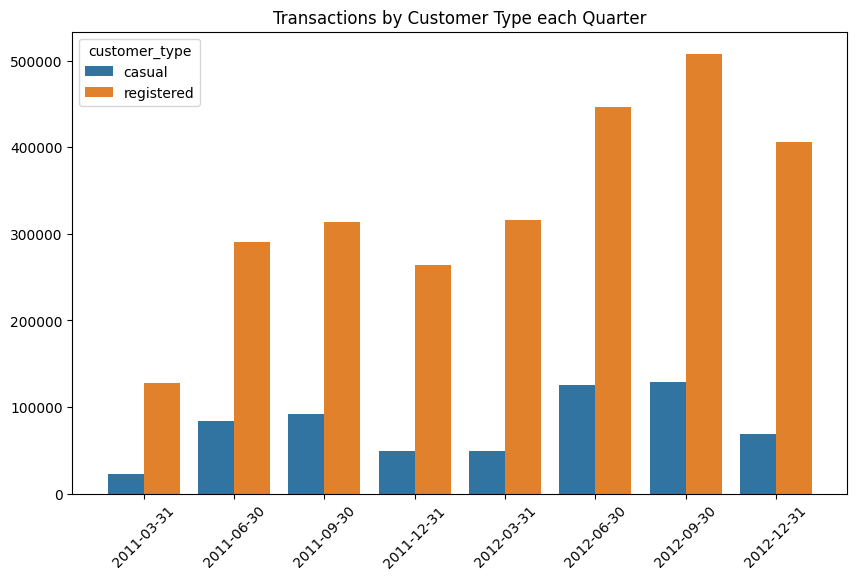

In [44]:
q_orders_melted = q_orders.melt(id_vars=["dteday"], var_name="customer_type", value_name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=q_orders_melted, x="dteday", y="count", hue="customer_type")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Transactions by Customer Type each Quarter")
plt.xticks(rotation=45)
plt.plot()

### Whether the increase or sales are affected by external factors:

[]

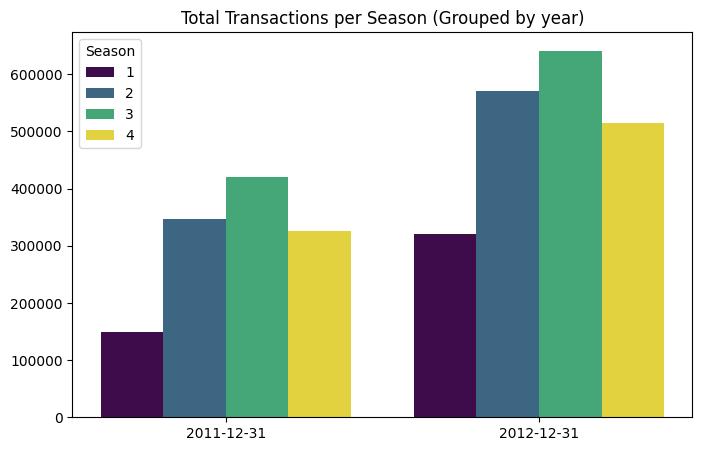

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(data=season_orders, x="dteday", y="cnt", hue="season", palette="viridis")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Total Transactions per Season (Grouped by year)")
plt.legend(title="Season", loc="best")
plt.plot()

[]

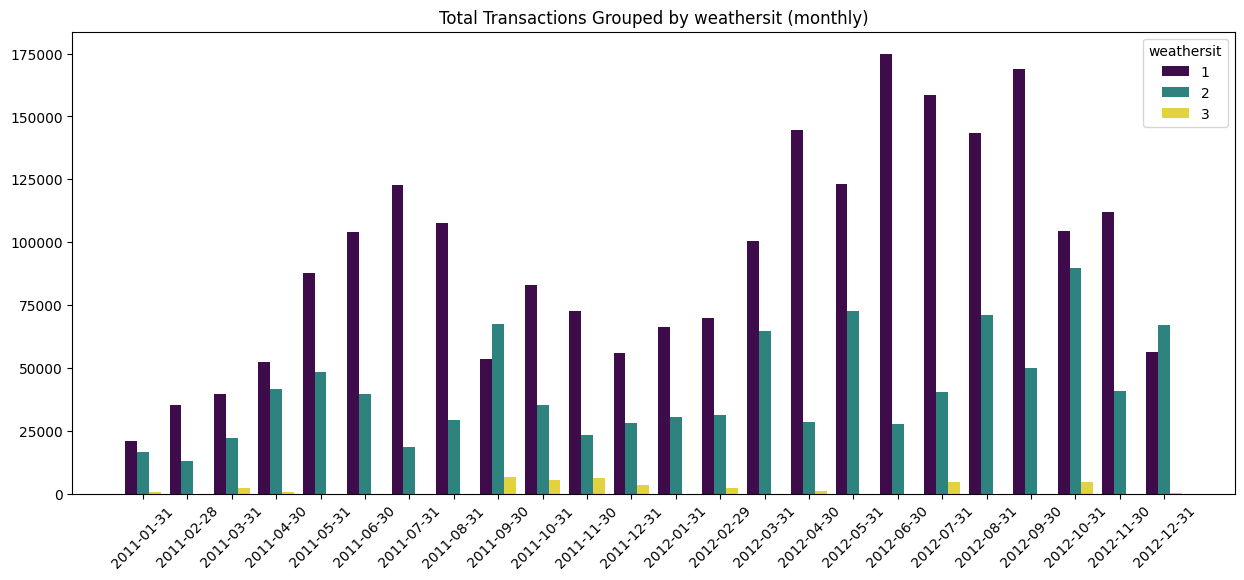

In [46]:
plt.figure(figsize=(15, 6))
sns.barplot(data=weathersit_orders, x="dteday", y="cnt", hue="weathersit", palette="viridis")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Total Transactions Grouped by weathersit (monthly)")
plt.legend(title="weathersit", loc="best")
plt.xticks(rotation=45)
plt.plot()

**Insight:**
- The monthly trend shows that transaction decrease dramatically from September to December every year
- Transaction happen a lot when the weather Clear, Few clouds, Partly cloudy
- Increased transactions occur in summer and fall
- Registered customer domination transaction in each quarter

## Clustering

In [47]:
cluster_df = day_df.groupby(by=pd.Grouper(key="dteday", freq="ME")).cnt.sum().reset_index()

mean_value = cluster_df["cnt"].mean()
std_value = cluster_df["cnt"].std()

cluster_df["category"] = pd.cut(
    cluster_df["cnt"],
    bins=[0, mean_value, mean_value + std_value, float("inf")],
    labels=["Low Transaction", "Medium Transaction", "High Transaction"]
)

cluster_df

,dteday,cnt,category
0,2011-01-31,38189,Low Transaction
1,2011-02-28,48215,Low Transaction
2,2011-03-31,64045,Low Transaction
3,2011-04-30,94870,Low Transaction
4,2011-05-31,135821,Low Transaction
5,2011-06-30,143512,Medium Transaction
6,2011-07-31,141341,Medium Transaction
7,2011-08-31,136691,Low Transaction
8,2011-09-30,127418,Low Transaction
9,2011-10-31,123511,Low Transaction


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

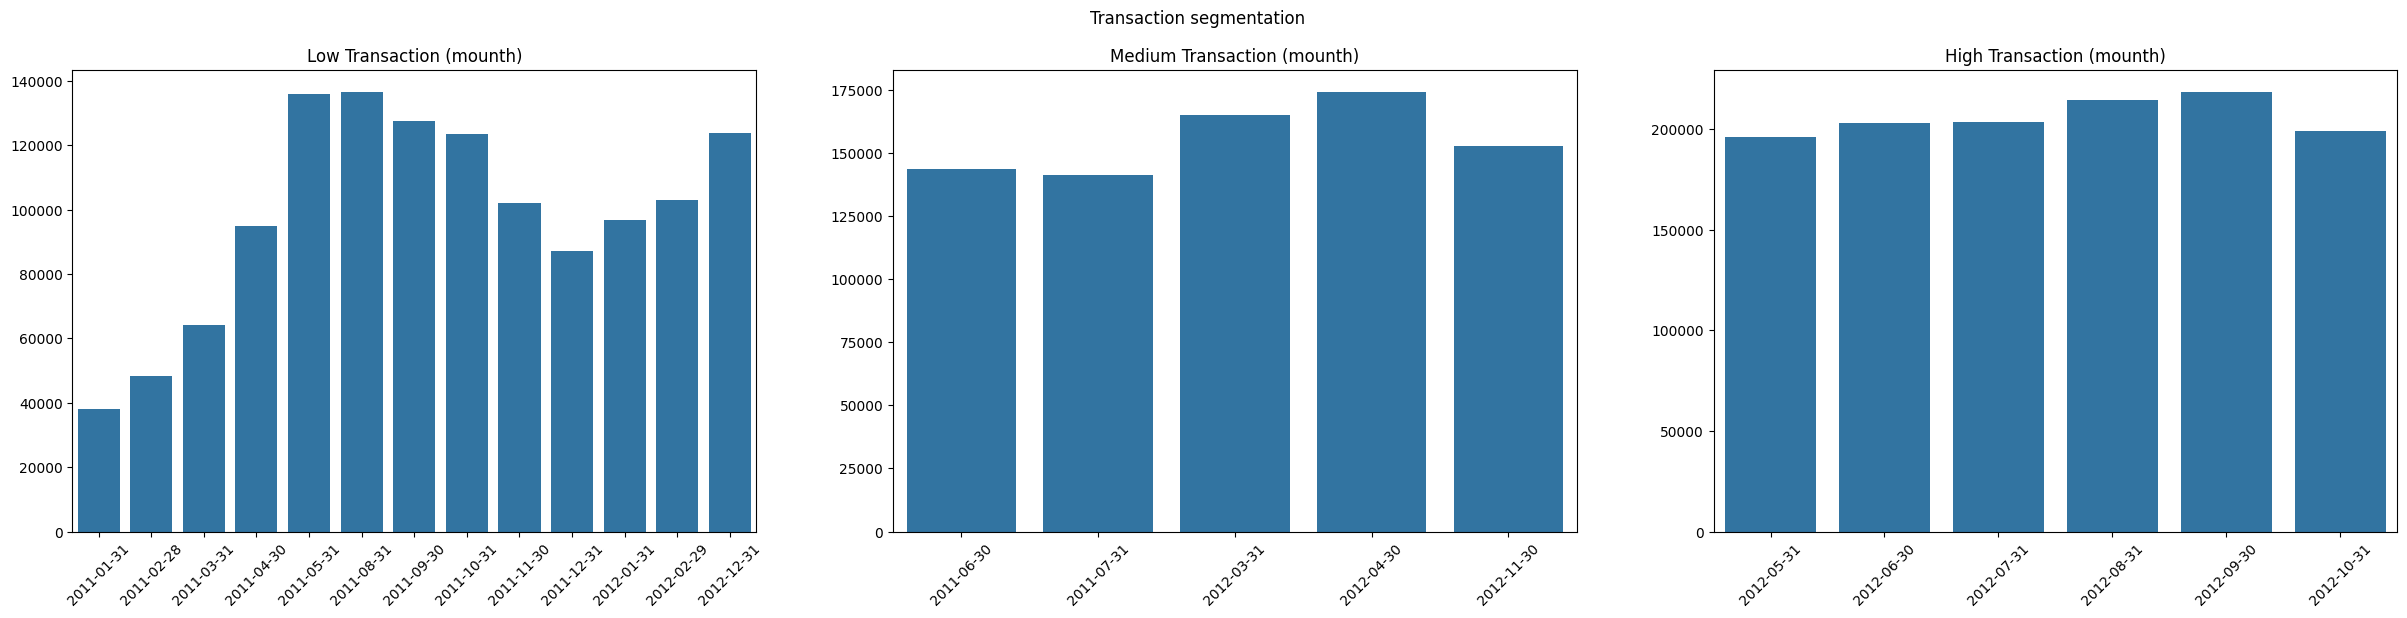

In [48]:
low_transaction_df = cluster_df[cluster_df["category"] == "Low Transaction"]
medium_transaction_df = cluster_df[cluster_df["category"] == "Medium Transaction"]
high_transaction_df = cluster_df[cluster_df["category"] == "High Transaction"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(data=low_transaction_df, x="dteday", y="cnt", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Low Transaction (mounth)", loc="center")
ax[0].tick_params(axis="x", rotation=45)

sns.barplot(data=medium_transaction_df, x="dteday", y="cnt", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Medium Transaction (mounth)", loc="center")
ax[1].tick_params(axis="x", rotation=45)

sns.barplot(data=high_transaction_df, x="dteday", y="cnt", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("High Transaction (mounth)", loc="center")
ax[2].tick_params(axis="x", rotation=45)

plt.suptitle("Transaction segmentation")
plt.plot

**Insight:**

Clustering is done based on domain understanding. transaction data is grouped into 3 parts, namely low transactions, medium transactions, and high transactions. the calculation is done by calculating the mean and standard deviation in the cnt column. 

low transaction = 0 to mean

medium transaction = mean to mean + standard deviation  

high transaction = mean + standard deviation up to the next level

## Conclusion

- There is an increase in transactions every month and always decreases from September to December.
- transactions are dominated by registered customers in each quarter
- decrease and increase in transactions are affected by weather and seasonality
- the busiest hour occurs at 17 o'clock every month.